# Normal Normal

In [1]:
import torch
import torch.distributions as dist
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")

import beanmachine.ppl as bm

class NormalNormal:
    @bm.random_variable
    def mu(self):
        return dist.Normal(0, 10)
    
    @bm.random_variable
    def x(self, i):
        return dist.Normal(self.mu(), 1.0)

In [2]:
from beanmachine.ppl.experimental.vi.VariationalInfer import MeanFieldVariationalInference

model = NormalNormal()

vi = MeanFieldVariationalInference()
queries = [model.mu()]
obs = {
    model.x(0): torch.tensor(10.0),
    model.x(1): torch.tensor(10.0),
}
vi_dicts = vi.infer(queries, obs, num_iter=300, lr=1e-1)

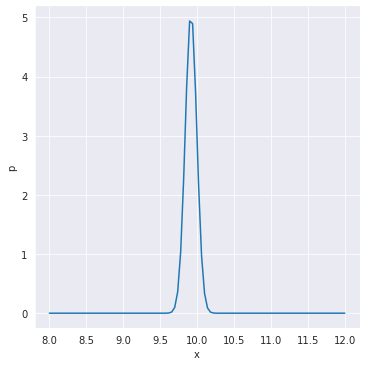

In [3]:
x = torch.linspace(8, 12).unsqueeze(1)
p = torch.exp(vi_dicts[model.mu()].log_prob(x))
sns.relplot(data=pd.DataFrame({
    "x": x.flatten().detach().numpy(),
    "p": p.flatten().detach().numpy(),
}), x="x", y="p", kind="line")

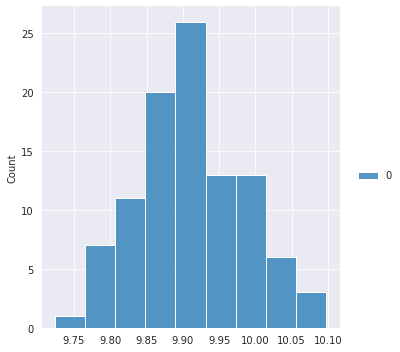

In [4]:
sns.displot(vi_dicts[model.mu()].sample((100,1)).detach().numpy())

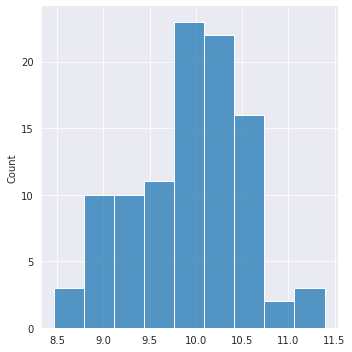

In [5]:
import beanmachine.ppl as bm

mcmc = bm.SingleSiteHamiltonianMonteCarlo(path_length=10)
samples = mcmc.infer(queries, obs, num_samples=100, num_chains=1)
sns.displot(samples[model.mu()].flatten().numpy())